In [3]:
from astropy.io import fits

#Open source data from the LIGO observatory (Washington and livingston centres) from the vizier data archive
#https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/493/3379/tablea3
file = fits.open('lightcurvesat2017gfo.fit')
print(file)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001D0C289FCB0>, <astropy.io.fits.hdu.table.TableHDU object at 0x000001D0C2970050>]


In [4]:
data = file[1].data
#Data contains 4 columns, Luminosity, AB magnitude, Filter and Time
#luminosity – the actual brightness (physical energy) of the kilonova. absolute magnitude – How bright the kilonova seems at a distance of 10pc

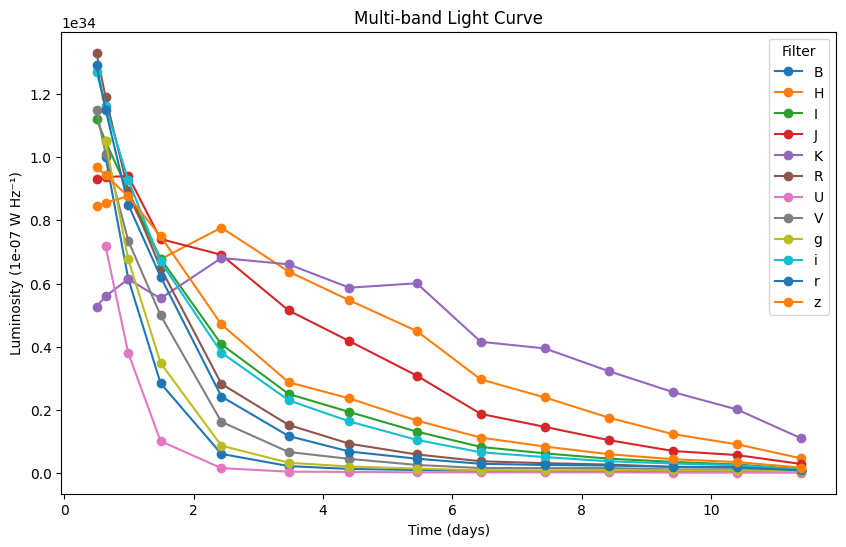

In [12]:
import matplotlib.pyplot as plt
import numpy as np

filters = np.unique(data['Filter']) #finds all unique filter values like 'U', 'B' 'R' etc.
plt.figure(figsize=(10, 6))

for f in filters:
    mask = data['Filter'] == f #creates a boolean array called mask that is true where the Filter matches the current filter and
                                #false where not
    time = data['Time'][mask].astype(float) #gets the time for values in that filter
    lum = (data['Lum'][mask].astype(float)*1e+7) #gets the luminosity for values in that filter
    plt.plot(time, lum, marker='o', linestyle='-', label=f if hasattr(f, 'decode') else f) 

plt.xlabel('Time (days)')
plt.ylabel('Luminosity (1e-07 W Hz⁻¹)')
plt.title('Multi-band Light Curve')
plt.legend(title='Filter')
plt.show()

# LUMINOSITY VS TIME LIGHT CURVE INTERPRETATION

- The luminosity the the Ultraviolet (U) and Blue (B) bands peak earlier and then decline as time increases.
- This can be explained due to the creation of heavy elements (such as lanthanides) by the R-process and their subsequent radioactive decay. The increased opacity of the ejecta (k) leads to the absorption of more Blue/UV light which is later re-emitted at lower Red and Infrared wavelength.
- This increase in Red and Infrared light at later times is reflected in the light curve, where the R and I bands peak. 

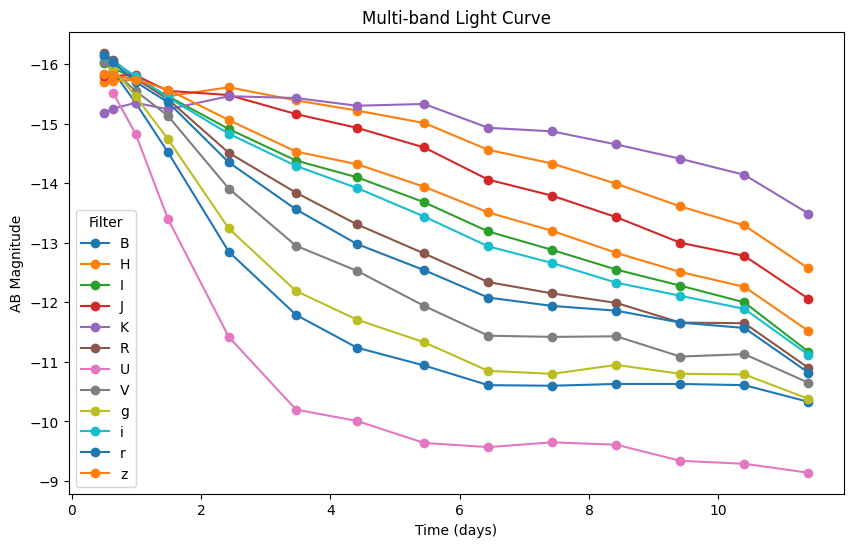

In [9]:
import matplotlib.pyplot as plt
import numpy as np

filters = np.unique(data['Filter']) #finds all unique filter values like 'U', 'B' 'R' etc.
plt.figure(figsize=(10, 6))

for f in filters:
    mask = data['Filter'] == f #creates a boolean array called mask that is true where the Filter matches the current filter and
                                #false where not
    time = data['Time'][mask].astype(float) #gets the time for values in that filter
    mag = data['Mag'][mask].astype(float)  #gets the ABSOLUTE magnitude for values in that filter
    plt.plot(time, mag, marker='o', linestyle='-', label=f if hasattr(f, 'decode') else f) 

plt.gca().invert_yaxis()
plt.xlabel('Time (days)')
plt.ylabel('AB Magnitude')
plt.title('Multi-band Light Curve')
plt.legend(title='Filter')
plt.show()

# Magnitude vs Time

- The magnitude in the data was the ABSOLUTE magnitude, or the magnitude when viewed from a distance of 10 Parsec.
- We know that magnitudes work in reverse (log scale of luminosity) , a.k.a, a 'higher' magnitude of -9 as compared to a lower magnitude of -16 is actually LESS bright, and the lower magnitude is MORE bright.
- Again, we see the UV and B band peak earlier and start to drop around t ∽ 0.5-1 day, whilst the R and I bands increase later on, eventually decreasing as described by the radioactive heating rate declining as a POWER LAW after the merger (∝t⁻¹³). 

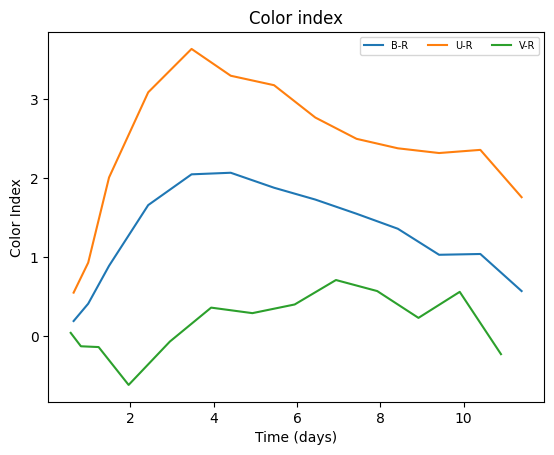

In [15]:
from scipy import interpolate
mag_r= []
time_r= []
mag_b = []
time_b = []
mag_u = []
time_u = []
mag_v = []
time_v = []
col_index_br = {}
col_index_ur = {}
col_index_vr = {}
for line in data:
    if line['Filter'] == 'B':
        mag_b.append(line['Mag'])
        time_b.append(line['Time'])
        
    if line['Filter'] == 'R':
        mag_r.append(line['Mag'])
        time_r.append(line['Time'])

    if line['Filter'] == 'U':
        mag_u.append(line['Mag'])
        time_u.append(line['Time'])

    if line['Filter'] == 'V':
        mag_v.append(line['Mag'])
        time_v.append(line['Time'])

mag_r.pop(0) #none of the other filters contain a magnitude at time '0.5', so i remove that value in the R filter's data set to make it more accurate.
time_r.pop(0)
f = interpolate.interp1d(time_b, mag_b, fill_value='extrapolate') #extrapolated values fitting the other bands to the R band. Less accurate.
# time_b.insert(0, np.float64(0.5))
# mag_b.insert(0, f(time_b[0]))
for i in range(len(mag_r)):
    col_index_br[(mag_b[i] - mag_r[i]).astype(float)] = ((time_b[i] + time_r[i])/2).astype(float)
    col_index_ur[(mag_u[i] - mag_r[i]).astype(float)] = ((time_u[i] + time_r[i])/2).astype(float)
    col_index_vr[(mag_v[i] - mag_r[i]).astype(float)] = ((time_v[i] + time_r[i])/2).astype(float)
plt.plot(col_index_br.values(), col_index_br.keys(),'-', label="B-R") 
plt.plot(col_index_ur.values(), col_index_ur.keys(),'-', label="U-R") 
plt.plot(col_index_vr.values(), col_index_vr.keys(),'-', label="V-R") 
plt.xlabel('Time (days)')
plt.ylabel('Color Index')
plt.title('Color index')
plt.legend(loc='upper right', fontsize = 7, ncol = 3)
plt.show()

# Color Indexes 
- CI = Mag(ɑ) - Mag(ʙ)
- The lower the color index, the brighter the curve is in band ɑ and vice versa.
- For the B-R color index, we see an increase around t ∽ 0.5 - 1, the same time the kilonova starts to become brighter in the R filter and dimmer in the B filter.
- The U-R color index is even greater. This is because the U band is more ultraviolet (shorter wavelength) than the B band, which probes the blue part of the optical range.
- At early times, the kilonova is very hot and emits strong UV and blue light, but its flux drops off steeply moving from B to U bands due to increasing opacity and absorption in the UV part of the spectrum.
- The U band is more sensitive to absorption from lanthanides and other heavy elements, which strongly suppress UV flux (amount of UV light passing through a surface), causing U magnitudes to be fainter (larger numerically) than B magnitudes.
- The R band, being much redder, sees relatively less flux attenuation compared to U or B, so the difference U–R is naturally larger than B–R under typical kilonova spectral energy distributions.